In [1]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

In [3]:
h5_path = 'train_tiles2.h5'
with h5py.File(h5_path, 'r') as h5:
    data = np.array(h5.get('lowres'))
    label = np.array(h5.get('highres'))

Model: "9m9-64-64-100-64-64-100-64-64-deconv2-glorot"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 128, 128, 100)     57700     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      57664     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 256, 256, 100)     57700     
_________________________________________________________________
conv2d_4 (Conv2D)     

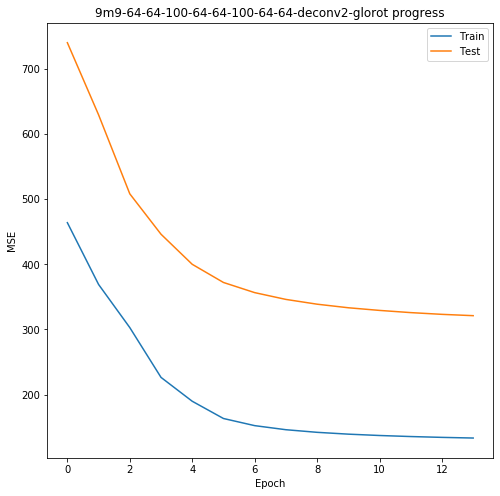

In [5]:
model_name = "9m9-64-64-100-64-64-100-64-64-deconv2-glorot"
batch_size = 30
epochs = 15

conv2d_params = { 
    'kernel_size': (3,3), 
    'strides': (1, 1), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
conv2dt_params = { 
    'kernel_size': (3,3), 
    'strides': (2, 2), 
    'padding': 'same', 
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
model = Sequential(name=model_name)
model.add(Conv2D(filters=64, **conv2d_params, input_shape=(64,64,3)))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2DTranspose(filters=100, **conv2dt_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=64, **conv2d_params))
model.add(Conv2D(filters=3, **conv2d_params))
model.summary()

# Model training
model.compile(optimizer=Adam(learning_rate=0.00001), loss="mean_squared_error")
checkpoint = ModelCheckpoint(f"models/{model_name}.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
callbacks_list = [checkpoint]
training = model.fit(x=data, y=label, validation_split=0.2,
                     batch_size=batch_size, epochs=epochs, callbacks=callbacks_list)

# Training plot
plt.figure(figsize=(8,8))
plt.plot(training.history['loss'][1:])
plt.plot(training.history['val_loss'][1:])
plt.title(f"{model_name} progress")
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
model_name = '9m9-64-64-100-100-64-64'
batch_size = 30
epochs = 15

default_params = { 'kernel_size': (3,3), 'strides': (1, 1), 'padding': 'same', 'activation': 'relu' }
model = Sequential(name=model_name)
model.add(Conv2D(filters=64, **default_params, input_shape=(64,64,3)))
model.add(Conv2D(filters=64, **default_params))
model.add(UpSampling2D())
model.add(Conv2D(filters=100, **default_params))
model.add(Conv2D(filters=100, **default_params))
model.add(UpSampling2D())
model.add(Conv2D(filters=64, **default_params))
model.add(Conv2D(filters=64, **default_params))
model.add(Conv2D(filters=3, **default_params))
model.summary()

# Model training
model.compile(optimizer=Adam(learning_rate=0.00001), loss="mean_squared_error")
checkpoint = ModelCheckpoint(f"models/{model_name}.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
callbacks_list = [checkpoint]
training = model.fit(x=data, y=label, validation_split=0.2,
                     batch_size=batch_size, epochs=epochs, callbacks=callbacks_list)

# Training plot
plt.figure(figsize=(8,8))
plt.plot(training.history['loss'][1:])
plt.plot(training.history['val_loss'][1:])
plt.title(f"{model_name} progress")
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Model: "9m9-64-64-100-100-64-64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 100)     57700     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 100)     90100     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 256, 100)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 25

In [ ]:
model_name = '9m9-64-64-100-100-64-64-glorot'
batch_size = 30
epochs = 10

default_params = {
    'kernel_size': (3,3),
    'strides': (1, 1),
    'padding': 'same',
    'activation': 'relu',
    'kernel_initializer': 'glorot_uniform'
}
model = Sequential(name=model_name)
model.add(Conv2D(filters=64, **default_params, input_shape=(64,64,3)))
model.add(Conv2D(filters=64, **default_params))
model.add(UpSampling2D())
model.add(Conv2D(filters=100, **default_params))
model.add(Conv2D(filters=100, **default_params))
model.add(UpSampling2D())
model.add(Conv2D(filters=64, **default_params))
model.add(Conv2D(filters=64, **default_params))
model.add(Conv2D(filters=3, **default_params))
model.summary()

# Model training
model.compile(optimizer=Adam(learning_rate=0.00001), loss="mean_squared_error")
checkpoint = ModelCheckpoint(f"models/{model_name}.h5", monitor='val_loss', verbose=1, save_best_only=True,
                                 save_weights_only=False, mode='min')
callbacks_list = [checkpoint]
training = model.fit(x=data, y=label, validation_split=0.2,
                     batch_size=batch_size, epochs=epochs, callbacks=callbacks_list)

# Training plot
plt.figure(figsize=(8,8))
plt.plot(training.history['loss'][1:])
plt.plot(training.history['val_loss'][1:])
plt.title(f"{model_name} progress")
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()